In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [53]:
# 构造数据
num_example = 1000
num_input = 2
true_w = torch.tensor([2.45,-3.41],dtype=torch.float32,requires_grad=False)
true_b = torch.tensor(5,dtype =torch.float32)

features = torch.randn(size=(num_example, num_input), dtype=torch.float32)
labels = features.mv(true_w) + true_b + torch.normal(0, 0.01, (num_example,))

In [54]:
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000]))

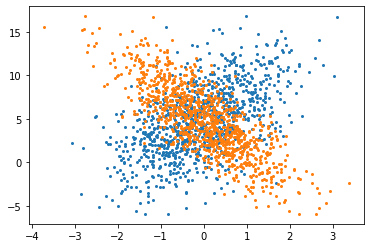

In [55]:
plt.scatter(features[:,0], labels, 4)
plt.scatter(features[:,1], labels, 4)

In [117]:
## 定义损失函数
def loss(y_hat, y):
    return (y_hat - y.view(y_hat.shape)) **2 / 2

In [91]:
def model(X,w,b):
    return torch.mm(X, w) + b

In [81]:
def iter_data(X,y,batch_size):
    indices = list(np.arange(0,num_example))
    random.shuffle(indices)
    for i in range(0, num_example, batch_size):
        index = torch.LongTensor(indices[i: min(num_example,i+batch_size)])
        yield X.index_select(0, index), y.index_select(0, index)

In [82]:
# test
for X,y in iter_data(features,labels,10):
    print(X,y)
    break

tensor([[ 0.9332, -0.6821],
        [ 1.1475,  0.2117],
        [-0.7237,  1.2996],
        [-1.4737, -0.2237],
        [-0.3336,  0.2304],
        [-0.2843, -2.6845],
        [-0.4637, -0.5457],
        [ 1.1343, -0.5492],
        [ 0.5478,  0.1936],
        [ 1.3239, -0.2233]]) tensor([ 9.6139,  7.0748, -1.2032,  2.1655,  3.3975, 13.4586,  5.7378,  9.6609,
         5.6857,  9.0056])


In [83]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [122]:
w = torch.normal(0, 0.01, (num_input, 1), dtype=torch.float32, requires_grad=True)
b = torch.zeros((1,), dtype=torch.float32, requires_grad=True)
batch_size = 10
epochs = 5
lr = 0.03
for i in range(epochs):
    for X,y in iter_data(features,labels,batch_size):
        y_hat = model(X,w,b)
        l = loss(y_hat,y).sum()
        l.backward()
        sgd([w,b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_loss = loss(model(features,w,b),labels).sum()
    print('epoch: %d, loss:%f' %(epochs+1, train_loss))b
    

epoch: 6, loss:76.553909
epoch: 6, loss:0.368697
epoch: 6, loss:0.052033
epoch: 6, loss:0.050422
epoch: 6, loss:0.050352


In [125]:
print(w,true_w)
print(b,true_b)

tensor([[ 2.4496],
        [-3.4100]], requires_grad=True) tensor([ 2.4500, -3.4100])
tensor([5.0002], requires_grad=True) tensor(5.)
